In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from music21 import converter
from helper_functions import get_file_and_dirnames
from analysis_functions import analyse_data_folder
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

PATH_TRANSPOSED = "../0_data/4_preprocessed_sets"

In [2]:
dir = "17_POP909-Dataset-master"
df_no = analyse_data_folder(f"{PATH_TRANSPOSED}/a)_4_4_metric_120_bpm/{dir}", compute_metrics=False)
df_key = analyse_data_folder(f"{PATH_TRANSPOSED}/b)_transposed_key/{dir}", compute_metrics=False)
df_oct = analyse_data_folder(f"{PATH_TRANSPOSED}/c)_transposed_octave/{dir}", compute_metrics=False)
df_key_oct = analyse_data_folder(f"{PATH_TRANSPOSED}/d)_transposed_key_and_octave/{dir}", compute_metrics=False)
df_key_oct.head()

100%|██████████| 803/803 [04:18<00:00,  3.10it/s]


,name,type,length_sec,ticks_per_beat,track_count,numerator,denominator,clocks_per_click,notated_32nd_notes_per_beat,time_sig_count,...,vel_lowest,vel_highest,vel_avg,vel_same,duration_lowest,duration_highest,duration_avg,monophonic,overlap,error
0,564.mid,1,176.75,1024,2,4.0,4.0,24.0,8.0,1,...,90.0,119.0,109.0,False,0.083008,33.500000,0.454839,False,True,False
1,216.mid,1,216.62,1024,2,4.0,4.0,24.0,8.0,1,...,59.0,116.0,97.0,False,0.000977,15.000000,0.471889,False,True,False
2,558.mid,1,102.79,1024,2,4.0,4.0,24.0,8.0,1,...,94.0,120.0,115.0,False,0.000977,37.416992,0.360817,False,True,False
3,799.mid,1,120.71,1024,2,4.0,4.0,24.0,8.0,1,...,62.0,122.0,93.0,False,0.083008,25.833008,0.602549,True,True,False
4,014.mid,1,161.58,1024,2,4.0,4.0,24.0,8.0,1,...,104.0,120.0,113.0,False,0.083008,46.083008,0.591132,True,True,False


## Analyze Unique Columns

In [3]:
column_dic = {}
for i, df in enumerate([df_no, df_key, df_oct, df_key_oct]):
    column_dic[i] = {}
    for column in df.columns:
        if len(df[column].unique()) == 1:
            column_dic[i][column] = df[column].unique()[0]
column_dic
pd.DataFrame(column_dic)

,0,1,2,3
type,1,1,1,1
ticks_per_beat,480,1024,1024,1024
track_count,2,2,2,2
numerator,4.0,4.0,4.0,4.0
denominator,4.0,4.0,4.0,4.0
clocks_per_click,24.0,24.0,24.0,24.0
notated_32nd_notes_per_beat,8.0,8.0,8.0,8.0
time_sig_count,1,1,1,1
tempo,500000.0,500000.0,500000.0,500000.0
bpm,120,120,120,120


## convert folder 4_a to 1024 ticks per beat

In [4]:
# get files from folder
dir = "17_POP909-Dataset-master"
files,_ = get_file_and_dirnames(f"{PATH_TRANSPOSED}/a)_4_4_metric_120_bpm/{dir}")
files.sort()

# convert files to 1024 ticks per beat with music21 converter
for f in tqdm(files):
    midi_score = converter.parse(f"{PATH_TRANSPOSED}/a)_4_4_metric_120_bpm/{dir}/{f}")
    midi_score.write("midi", fp=f"{PATH_TRANSPOSED}/a)_4_4_metric_120_bpm/{dir}/{f}")

100%|██████████| 902/902 [07:21<00:00,  2.04it/s]


In [5]:
df_no_new = analyse_data_folder(f"{PATH_TRANSPOSED}/a)_4_4_metric_120_bpm/{dir}", compute_metrics=False)

100%|██████████| 902/902 [06:30<00:00,  2.31it/s]


In [6]:
column_dic = {}
for i, df in enumerate([df_no_new, df_key, df_oct, df_key_oct]):
    column_dic[i] = {}
    for column in df.columns:
        if len(df[column].unique()) == 1:
            column_dic[i][column] = df[column].unique()[0]
column_dic
pd.DataFrame(column_dic)

,0,1,2,3
type,1,1,1,1
ticks_per_beat,1024,1024,1024,1024
track_count,2,2,2,2
numerator,4.0,4.0,4.0,4.0
denominator,4.0,4.0,4.0,4.0
clocks_per_click,24.0,24.0,24.0,24.0
notated_32nd_notes_per_beat,8.0,8.0,8.0,8.0
time_sig_count,1,1,1,1
tempo,500000.0,500000.0,500000.0,500000.0
bpm,120,120,120,120


## Analyze song length

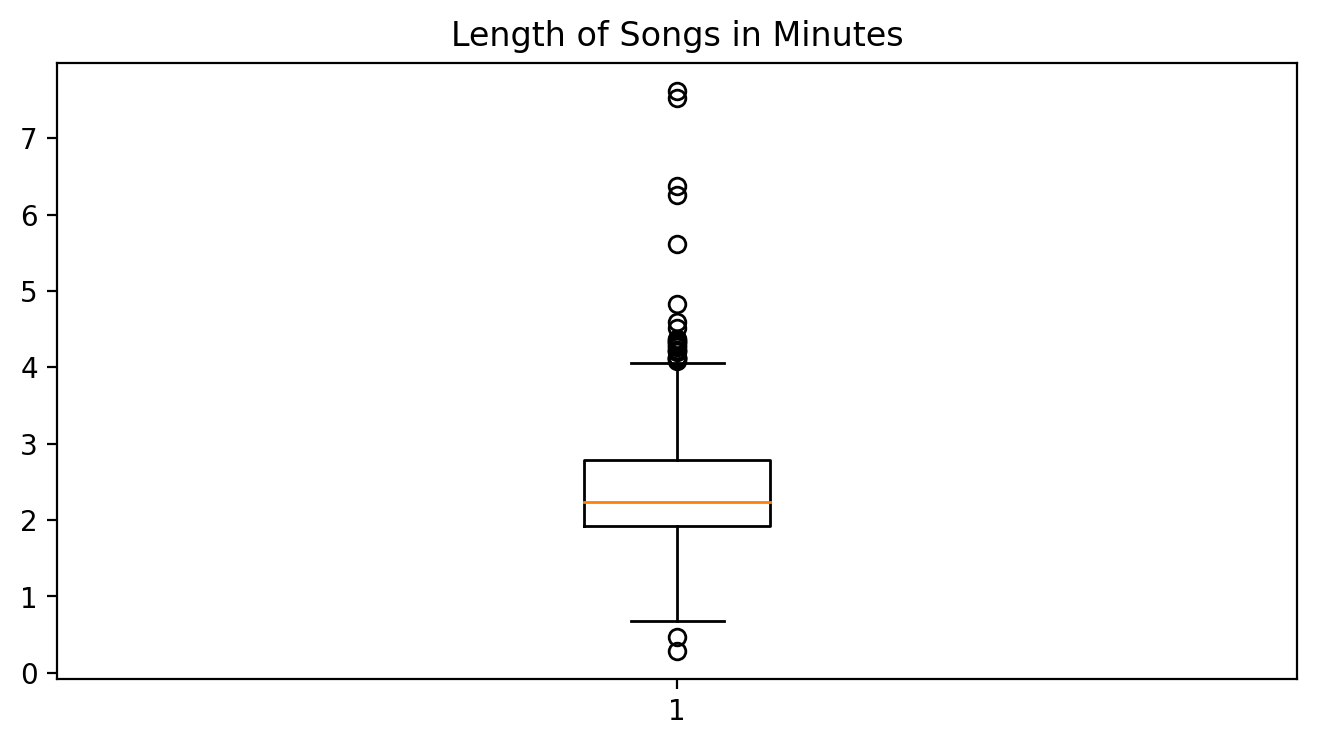

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(df_key_oct["length_sec"]/60)
ax.set_title("Length of Songs in Minutes")
plt.show()